In [1]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Rohit Sharma - Sheet1.csv')

In [3]:
data

,Year,Mat,Inns,NO,100s,50s,0s,HS,Runs,Avg,S/R,Ca,St
0,2007,4,3,0,0,1,0,52,61,20.33,82.43,3,0
1,2008,28,28,7,0,3,2,70*,532,25.33,72.58,8,0
2,2009,9,7,3,0,0,1,43*,102,25.50,65.81,7,0
3,2010,15,14,1,2,1,2,114,504,38.77,86.01,5,0
4,2011,16,16,5,0,6,0,95,611,55.55,82.68,3,0
5,2012,14,13,0,0,1,3,68,168,12.92,66.93,6,0
6,2013,28,27,4,2,8,0,209,1196,52.00,80.81,6,0
7,2014,12,12,1,1,3,0,264,578,52.55,94.29,5,0
8,2015,17,17,1,3,4,2,150,815,50.94,95.43,6,0
9,2016,10,10,1,2,2,0,171*,564,62.67,95.27,5,0


Forecasting the S/R for next year

In [4]:
df = data[['Year','S/R']]

In [5]:
df = df[:-1]

In [6]:
df

,Year,S/R
0,2007,82.43
1,2008,72.58
2,2009,65.81
3,2010,86.01
4,2011,82.68
5,2012,66.93
6,2013,80.81
7,2014,94.29
8,2015,95.43
9,2016,95.27


In [7]:
df.rename(columns={'Year': 'ds', 'S/R': 'y'}, inplace=True)

In [8]:
df['ds'] = pd.to_datetime(df['ds'])

In [9]:
df['y_orig'] = df['y'] # to save a copy of the original data..you'll see why shortly. 
df['y'] = np.log(df['y'])

In [10]:
df

,ds,y,y_orig
0,2007-01-01,4.411949,82.43
1,2008-01-01,4.284689,72.58
2,2009-01-01,4.186772,65.81
3,2010-01-01,4.454464,86.01
4,2011-01-01,4.414978,82.68
5,2012-01-01,4.203647,66.93
6,2013-01-01,4.392101,80.81
7,2014-01-01,4.546375,94.29
8,2015-01-01,4.558393,95.43
9,2016-01-01,4.556715,95.27


In [11]:
model = Prophet() #instantiate Prophet
model.fit(df)

20:02:27 - cmdstanpy - INFO - Chain [1] start processing
20:02:27 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
future_data = model.make_future_dataframe(periods=1, freq='Y')

In [13]:
future_data

,ds
0,2007-01-01
1,2008-01-01
2,2009-01-01
3,2010-01-01
4,2011-01-01
5,2012-01-01
6,2013-01-01
7,2014-01-01
8,2015-01-01
9,2016-01-01


In [14]:
forecast_data = model.predict(future_data)

In [15]:
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
7,2014-01-01,4.510320,4.405844,4.607333
8,2015-01-01,4.528040,4.427183,4.621937
9,2016-01-01,4.436519,4.339177,4.539911
10,2017-01-01,4.471190,4.367631,4.569937
11,2018-01-01,4.597995,4.496558,4.694162
12,2019-01-01,4.615539,4.516642,4.719407
13,2020-01-01,4.523848,4.421692,4.622035
14,2021-01-01,4.558460,4.461122,4.657451
15,2022-01-01,4.685265,4.580423,4.791463
16,2022-12-31,3.596475,3.492969,3.699384


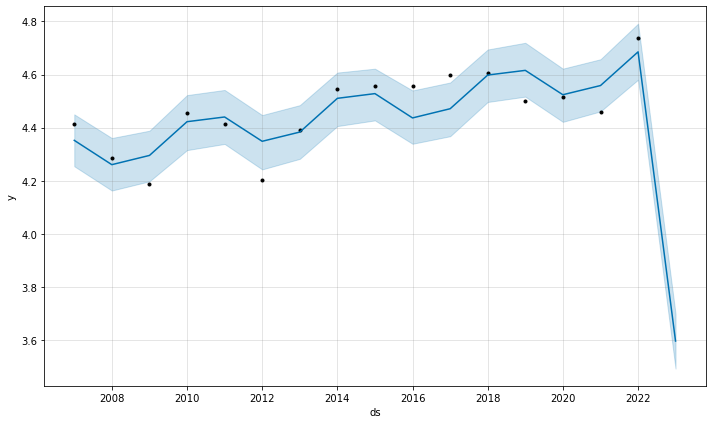

In [17]:
model.plot(forecast_data);

C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\Users\ASUS\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


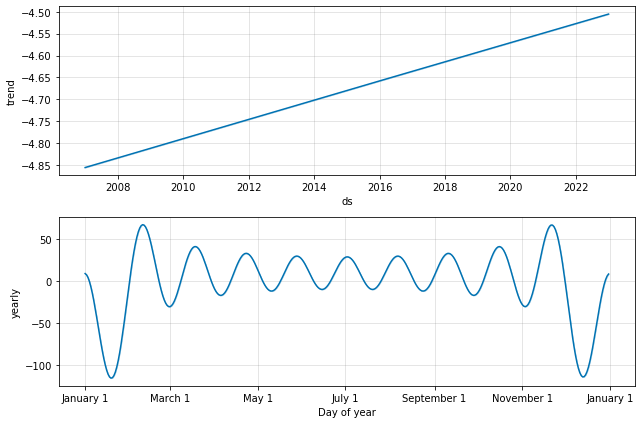

In [18]:
model.plot_components(forecast_data);

In [19]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

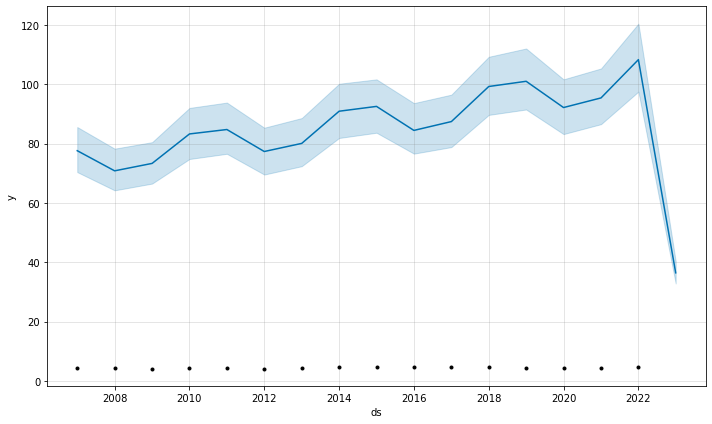

In [20]:
model.plot(forecast_data_orig);

In [21]:
df['y_log']=df['y'] #copy the log-transformed data to another column
df['y']=df['y_orig']

In [22]:
final_df = pd.DataFrame(forecast_data_orig)

In [23]:
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'

In [24]:
df

,ds,y,y_orig,y_log
0,2007-01-01,82.43,82.43,4.411949
1,2008-01-01,72.58,72.58,4.284689
2,2009-01-01,65.81,65.81,4.186772
3,2010-01-01,86.01,86.01,4.454464
4,2011-01-01,82.68,82.68,4.414978
5,2012-01-01,66.93,66.93,4.203647
6,2013-01-01,80.81,80.81,4.392101
7,2014-01-01,94.29,94.29,4.546375
8,2015-01-01,95.43,95.43,4.558393
9,2016-01-01,95.27,95.27,4.556715


In [25]:
future_data

,ds
0,2007-01-01
1,2008-01-01
2,2009-01-01
3,2010-01-01
4,2011-01-01
5,2012-01-01
6,2013-01-01
7,2014-01-01
8,2015-01-01
9,2016-01-01


In [26]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-01-01,-4.855916,70.426589,85.622273,-4.855916,-4.855916,9.208007,9.208007,9.208007,9.208007,9.208007,9.208007,0.0,0.0,0.0,77.640660
1,2008-01-01,-4.833938,64.271628,78.325715,-4.833938,-4.833938,9.094514,9.094514,9.094514,9.094514,9.094514,9.094514,0.0,0.0,0.0,70.850828
2,2009-01-01,-4.811899,66.550063,80.515825,-4.811899,-4.811899,9.107264,9.107264,9.107264,9.107264,9.107264,9.107264,0.0,0.0,0.0,73.358955
3,2010-01-01,-4.789920,74.839795,92.061806,-4.789920,-4.789920,9.212266,9.212266,9.212266,9.212266,9.212266,9.212266,0.0,0.0,0.0,83.291437
4,2011-01-01,-4.767942,76.596705,93.864962,-4.767942,-4.767942,9.208007,9.208007,9.208007,9.208007,9.208007,9.208007,0.0,0.0,0.0,84.780498
5,2012-01-01,-4.745963,69.592553,85.391006,-4.745963,-4.745963,9.094514,9.094514,9.094514,9.094514,9.094514,9.094514,0.0,0.0,0.0,77.366273
6,2013-01-01,-4.723925,72.417656,88.644798,-4.723925,-4.723925,9.107264,9.107264,9.107264,9.107264,9.107264,9.107264,0.0,0.0,0.0,80.105047
7,2014-01-01,-4.701946,81.928273,100.216522,-4.701946,-4.701946,9.212266,9.212266,9.212266,9.212266,9.212266,9.212266,0.0,0.0,0.0,90.950920
8,2015-01-01,-4.679968,83.695332,101.690817,-4.679968,-4.679968,9.208007,9.208007,9.208007,9.208007,9.208007,9.208007,0.0,0.0,0.0,92.576896
9,2016-01-01,-4.657996,76.644462,93.682447,-4.657996,-4.657996,9.094514,9.094514,9.094514,9.094514,9.094514,9.094514,0.0,0.0,0.0,84.480314
